In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_excel("C:\\Users\\navee\\OneDrive\\Documents\\Global Superstore.xls")


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
df = df.drop(["Row ID",'Postal Code','Product ID'], axis=1)

In [8]:
df.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.375818
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296810


In [9]:
df.describe(include = 'object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,7,13,3,17,3788,4
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Staples,Medium
freq,14,30775,97,108,26518,915,2001,9994,11002,11117,31273,6152,227,29433


In [10]:
corr = df.corr(numeric_only = True)
corr

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.079055
Profit,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,0.768073,0.272649,-0.079055,0.354441,1.000000


In [11]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.head()

,Sales,Quantity,Discount,Profit,Shipping Cost
0,2309.650,7,0.0,762.1845,933.57
1,3709.395,9,0.1,-288.7650,923.63
2,5175.171,9,0.1,919.9710,915.49
3,2892.510,5,0.1,-96.5400,910.16
4,2832.960,8,0.0,311.5200,903.04


In [12]:
num = numerical_df.drop(['Profit'], axis=1)

In [13]:
'''
# Now we will look at outliers by IQR (Interquartile Range). 
# And by applying boundary conditions, we remove the data points which are out of boundary condition.
# Because the data points which are out of the boundary condition are called as outliers.
# So we remove them by using this method.
'''

# for k,v in num.items():
#     q1 = v.quantile(0.25)
#     q3 = v.quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     v_col = v[(v >= lower_bound) & (v <= upper_bound)]
    
#     # Dropping outliers from the original DataFrame
#     df = df[df[k].isin(v_col)]
    
#     # Calculate the percentage of outliers
#     perc = (len(v) - len(v_col)) * 100 / len(num)
#     print('Column {} outliers dropped: {:.2f}%'.format(k,perc))

'\n# Now we will look at outliers by IQR (Interquartile Range). \n# And by applying boundary conditions, we remove the data points which are out of boundary condition.\n# Because the data points which are out of the boundary condition are called as outliers.\n# So we remove them by using this method.\n'

In [10]:
# df.shape

In [11]:
# cont_columns=df.select_dtypes(include=['number']).columns
# cont_columns

In [12]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# df[cont_columns] = scaler.fit_transform(df[cont_columns])

# df.head()

In [13]:
# from sklearn.preprocessing import LabelEncoder

# label_e=LabelEncoder()
# categ_columns=df.select_dtypes(include=['object']).columns
# #categ_columns
# for col in categ_columns:
#     df[col]=label_e.fit_transform(df[col])

# df

<Axes: xlabel='Segment', ylabel='count'>

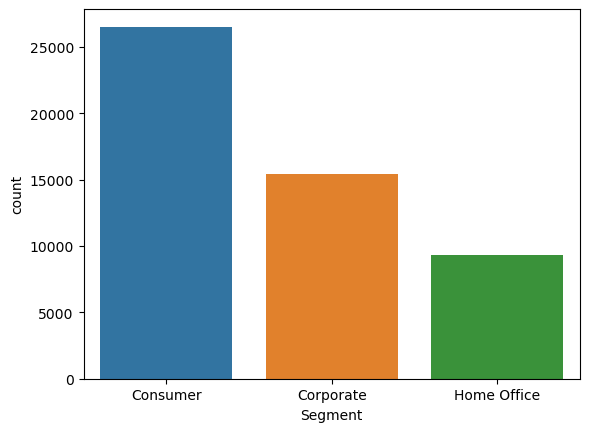

In [14]:
sns.countplot(data =df, x = 'Segment')

<Axes: xlabel='Ship Mode', ylabel='count'>

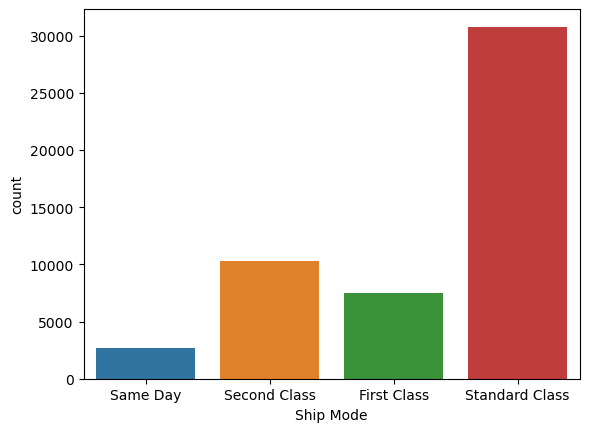

In [16]:
sns.countplot(data = df, x = 'Ship Mode')

In [18]:
a = df.groupby('Segment')['Profit']
a.sum()

Segment
Consumer       749239.78206
Corporate      441208.32866
Home Office    277009.18056
Name: Profit, dtype: float64

<Axes: xlabel='Market', ylabel='count'>

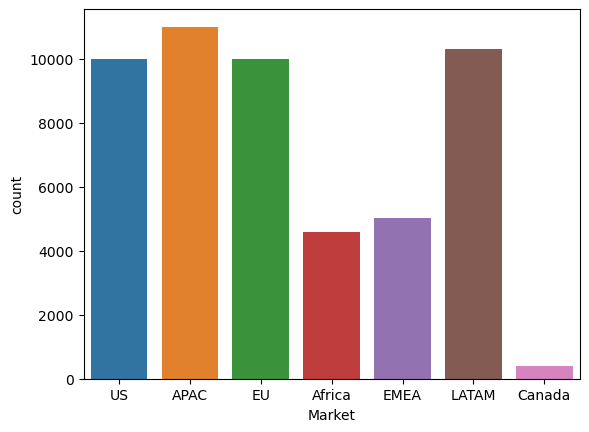

In [19]:
sns.countplot(data =df, x = 'Market')

<Axes: xlabel='Region', ylabel='count'>

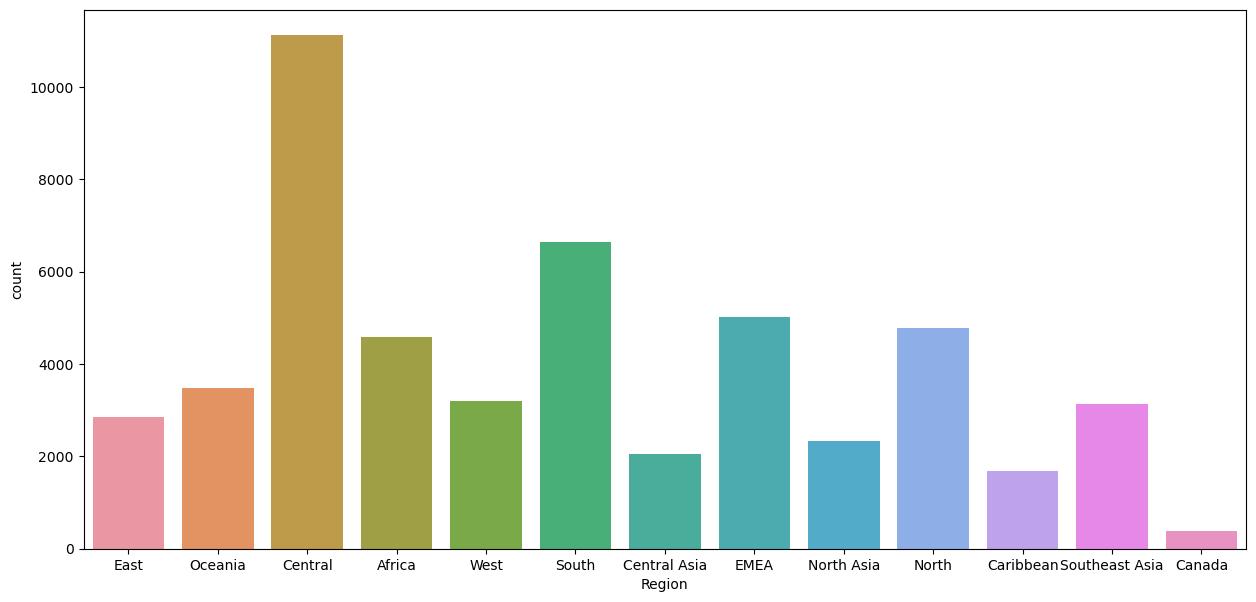

In [20]:
plt.figure(figsize = (15, 7))
sns.countplot(data= df, x='Region')

<Axes: xlabel='Category', ylabel='count'>

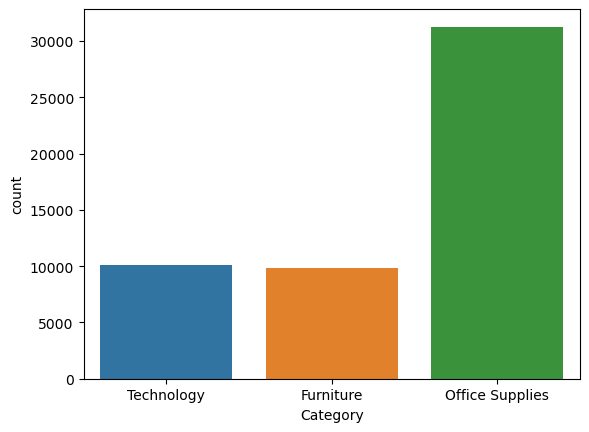

In [21]:
sns.countplot(data=df, x = 'Category')

In [22]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

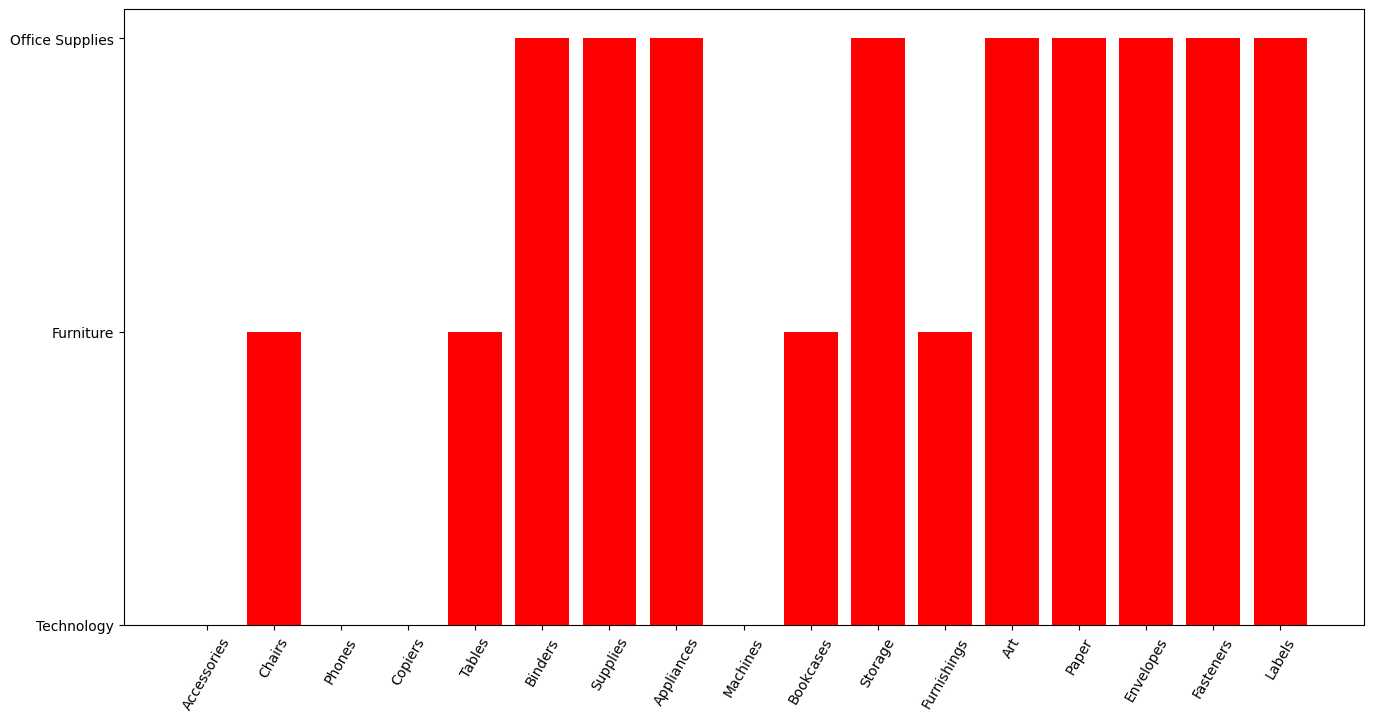

In [23]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='r')
plt.xticks(rotation=60)
plt.show()

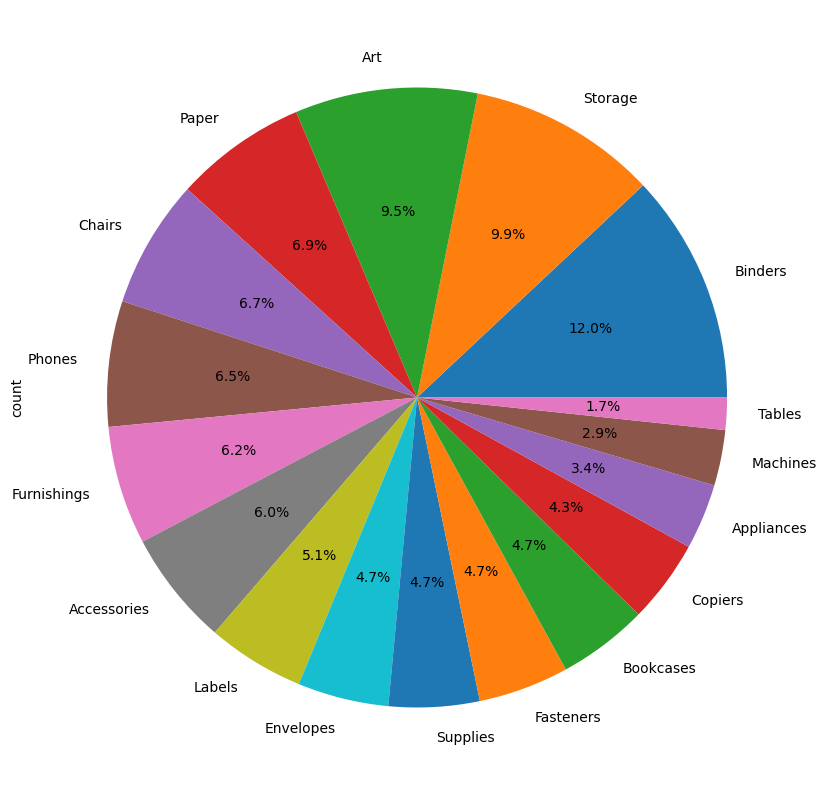

In [24]:
plt.figure(figsize=(10,15))
df['Sub-Category'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

In [25]:
profit = df.groupby("Sub-Category")['Profit']
profit.sum()

Sub-Category
Accessories    129626.30620
Appliances     141680.58940
Art             57953.91090
Binders         72449.84600
Bookcases      161924.41950
Chairs         140396.26750
Copiers        258567.54818
Envelopes       29601.11630
Fasteners       11525.42410
Furnishings     46967.42550
Labels          15010.51200
Machines        58867.87300
Paper           59207.68270
Phones         216717.00580
Storage        108461.48980
Supplies        22583.26310
Tables         -64083.38870
Name: Profit, dtype: float64

In [26]:
sales = df.groupby("Sub-Category")['Sales']
sales.sum()

Sub-Category
Accessories    7.492370e+05
Appliances     1.011064e+06
Art            3.720920e+05
Binders        4.619115e+05
Bookcases      1.466572e+06
Chairs         1.501682e+06
Copiers        1.509436e+06
Envelopes      1.709043e+05
Fasteners      8.324232e+04
Furnishings    3.855783e+05
Labels         7.340403e+04
Machines       7.790601e+05
Paper          2.442917e+05
Phones         1.706824e+06
Storage        1.127086e+06
Supplies       2.430742e+05
Tables         7.570419e+05
Name: Sales, dtype: float64

In [28]:
profit_sales = df.groupby(["Sub-Category"])[['Profit','Sales']]

<Figure size 1000x1500 with 0 Axes>

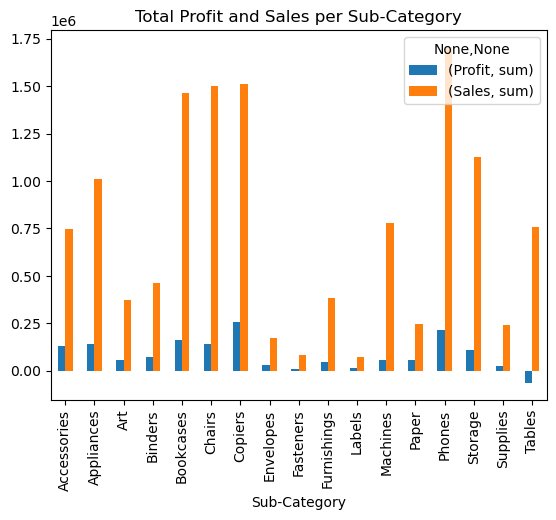

In [29]:
plt.figure(figsize=(10,15))
profit_sales.agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

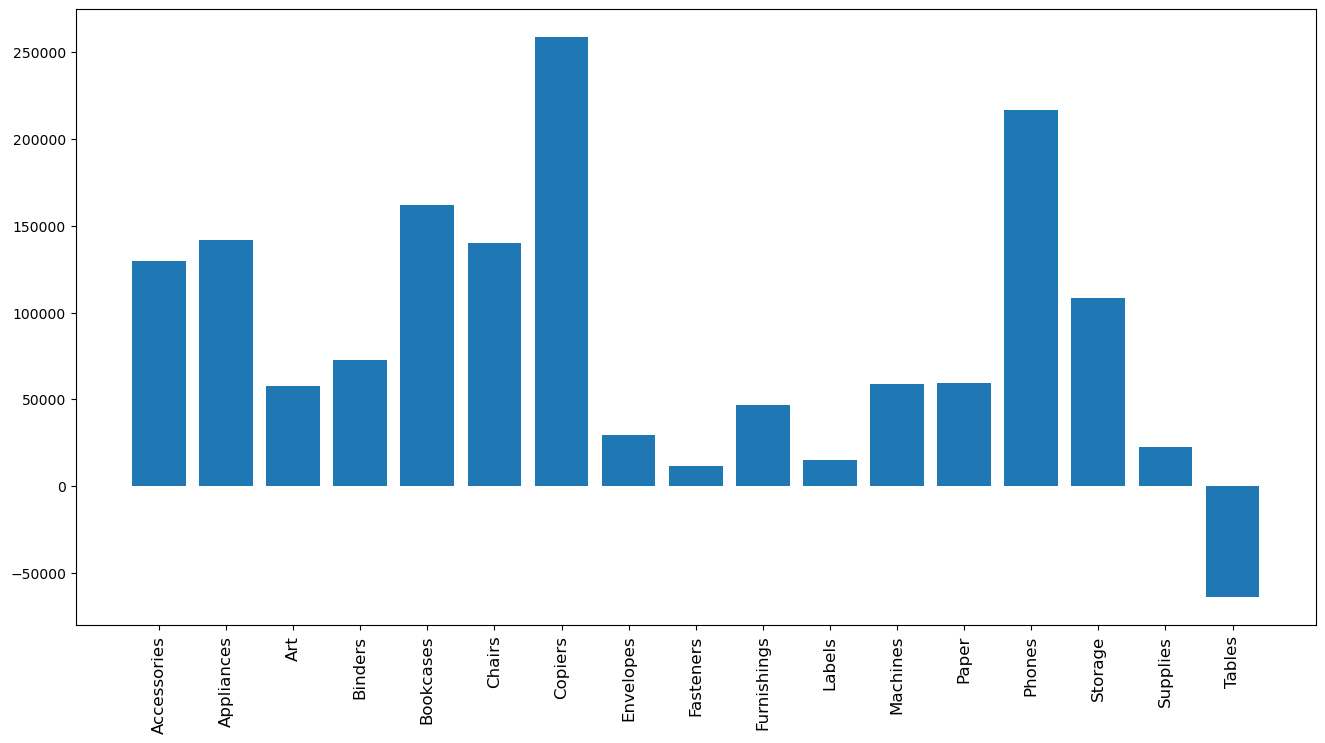

In [30]:
highest_subcategory_profit = df[['Sub-Category', 'Profit']].groupby(['Sub-Category']).sum().reset_index()
plt.figure(figsize=(16, 8))
plt.bar('Sub-Category', 'Profit', data = highest_subcategory_profit)
plt.xticks(rotation='vertical', size=12)
plt.show()

In [31]:
# Try accessing the 'Order Date' column again
df['Order Date'] = pd.to_datetime(df['Order Date'])
#df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Day of Week'] = df['Order Date'].dt.strftime('%A')
df['Day of Week'] = df['Order Date'].dt.dayofweek

# Define a function to classify the day of the week
def classify_day(day):
    if day < 5:  # Monday to Friday (0 to 4)
        return 'Weekday'
    else:        # Saturday or Sunday (5 or 6)
        return 'Holiday'

# Apply the function to the 'Day of Week' column to get 'Weekday' or 'Weekend'
df['Day Type'] = df['Day of Week'].apply(classify_day)

In [15]:
#df = df.drop(['Order ID','Order Date', 'Ship Date','Customer ID	'], axis = 1)

In [32]:
df['Day Type'].value_counts()

Day Type
Weekday    45720
Holiday     5570
Name: count, dtype: int64

In [33]:
corr = df.corr(numeric_only=True)
corr

,Sales,Quantity,Discount,Profit,Shipping Cost,Month,Day,Day of Week
Sales,1.000000,0.313577,-0.086722,0.484918,0.768073,0.001815,0.002319,0.005615
Quantity,0.313577,1.000000,-0.019875,0.104365,0.272649,0.020611,0.004509,0.002175
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.079055,0.000027,-0.006320,-0.015753
Profit,0.484918,0.104365,-0.316490,1.000000,0.354441,0.000140,-0.002413,0.006964
Shipping Cost,0.768073,0.272649,-0.079055,0.354441,1.000000,0.004929,0.005266,0.004101
Month,0.001815,0.020611,0.000027,0.000140,0.004929,1.000000,0.003281,0.000924
Day,0.002319,0.004509,-0.006320,-0.002413,0.005266,0.003281,1.000000,0.010089
Day of Week,0.005615,0.002175,-0.015753,0.006964,0.004101,0.000924,0.010089,1.000000


In [34]:
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[cont_columns] = scaler.fit_transform(df[cont_columns])

# df.head()

Correlation values ranges from -1 to 0 to +1.
By this correlation of numerical columns, we can conclude the relationship between columns and also features and target column.
Which ever feature has highest positive or negative correlation with the Taregt column is the important feature.
And which ever has less correlation either positive or negative, a assumption is to remove them if there are many or more features.

In [35]:
from sklearn.preprocessing import LabelEncoder

label_e=LabelEncoder()
categ_columns=df.select_dtypes(include=['object']).columns
#categ_columns
for col in categ_columns:
    df[col]=label_e.fit_transform(df[col])

df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Day,Day of Week,Day Type
0,1499,2012-07-31,2012-07-31,1,1286,632,0,2290,703,139,...,2309.650,7,0.0,762.1845,933.570,0,7,31,1,1
1,13063,2013-02-05,2013-02-07,2,808,413,1,3518,702,6,...,3709.395,9,0.1,-288.7650,923.630,0,2,5,1,1
2,12983,2013-10-17,2013-10-18,0,336,181,0,497,820,6,...,5175.171,9,0.1,919.9710,915.490,3,10,17,3,1
3,6813,2013-01-28,2013-01-30,0,873,424,2,375,145,47,...,2892.510,5,0.1,-96.5400,910.160,3,1,28,0,1
4,21702,2013-11-05,2013-11-06,1,1290,632,0,857,270,110,...,2832.960,8,0.0,311.5200,903.040,0,11,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,14068,2014-06-19,2014-06-19,1,854,427,1,1726,410,65,...,65.100,5,0.0,4.5000,0.010,3,6,19,3,1
51286,24236,2014-06-20,2014-06-24,3,1587,793,0,1400,982,139,...,0.444,1,0.8,-1.1100,0.010,3,6,20,4,1
51287,24088,2013-12-02,2013-12-02,1,899,452,2,2408,192,139,...,22.920,3,0.0,11.2308,0.010,1,12,2,0,1
51288,17703,2012-02-18,2012-02-22,3,1249,652,2,3346,955,17,...,13.440,2,0.0,2.4000,0.003,3,2,18,5,0


In [36]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Day,Day of Week,Day Type
0,1499,2012-07-31,2012-07-31,1,1286,632,0,2290,703,139,...,2309.650,7,0.0,762.1845,933.57,0,7,31,1,1
1,13063,2013-02-05,2013-02-07,2,808,413,1,3518,702,6,...,3709.395,9,0.1,-288.7650,923.63,0,2,5,1,1
2,12983,2013-10-17,2013-10-18,0,336,181,0,497,820,6,...,5175.171,9,0.1,919.9710,915.49,3,10,17,3,1
3,6813,2013-01-28,2013-01-30,0,873,424,2,375,145,47,...,2892.510,5,0.1,-96.5400,910.16,3,1,28,0,1
4,21702,2013-11-05,2013-11-06,1,1290,632,0,857,270,110,...,2832.960,8,0.0,311.5200,903.04,0,11,5,1,1


In [37]:
df = df.drop(['Ship Date','Order Date'], axis =1)

In [38]:
df = df.drop(['Order ID','Customer ID'], axis =1)

In [39]:
df.shape

(51290, 21)

In [40]:
X = df.drop(['Profit'], axis =1)
y = df['Profit']

In [41]:
y.shape

(51290,)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [43]:
X_train.shape

(35903, 20)

In [44]:
X_test.shape

(15387, 20)

In [45]:
print(y_test.shape, y_train.shape)

(15387,) (35903,)


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [47]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=5)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=42)

In [48]:
y_pred_dt = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)


In [49]:
mse = mean_squared_error(y_test, y_pred_dt)
mse

9273.580550308101

In [50]:
y_train_pred_dt = tree_reg.predict(X_train)
tree_reg.score(X_train, y_train)

0.7716276363935513

In [51]:
r2_score(y_test, y_pred_dt)

0.6830813648264358

In [52]:
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# parameters = {'max_depth':[3,4,6,5,7,8,10], 'max_features' : [8,13,14,15,16,17,18,21,20]}
# DecisionTreeRegressor = DecisionTreeRegressor()

# grid_search = GridSearchCV(estimator=DecisionTreeRegressor, param_grid=parameters, scoring='r2', cv=5)
# grid_search.fit(X_train, y_train)
# test_score = grid_search.score(X_test,y_test)
# train_score = grid_search.score(X_train,y_train)

# print("Best parameters found: ", grid_search.best_params_)
# print("Best R2 score found: ", grid_search.best_score_)
# print("Best R2 score of training", train_score)
# print("Best R2 score of test", test_score)


In [53]:
# parameters = {'alpha':  [0.1,0.01,  1, 5, 10, 20]}
# from sklearn.linear_model import Lasso

# lasso = Lasso()
# grid_search = GridSearchCV(estimator=lasso, param_grid=parameters, scoring='r2', cv=5)
# grid_search.fit(X_train, y_train)s

# print("Best parameters found: ", grid_search.best_params_)
# print("Best R2 score found: ", grid_search.best_score_)

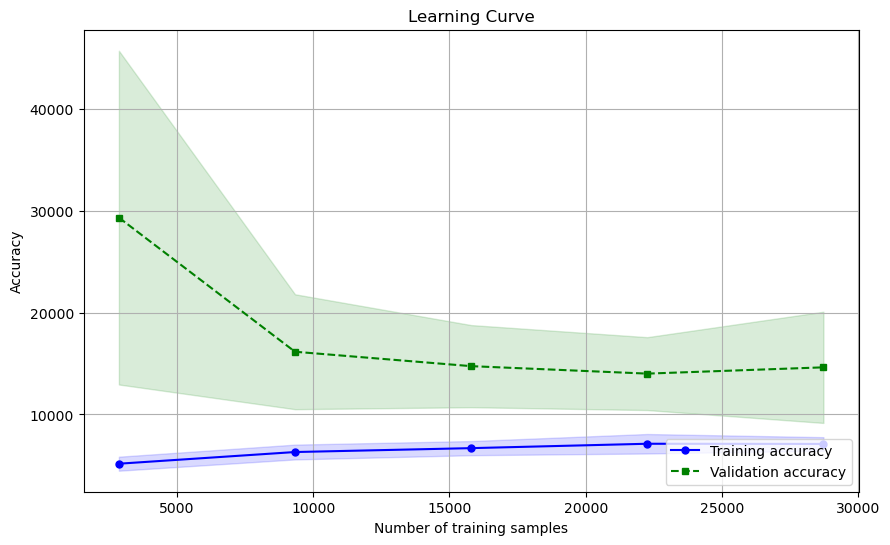

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, train_sizes=np.linspace(0.1, 1.0, 5,10), cv=5):
    """
    Plots the learning curve for an estimator.

    Parameters:
        estimator: Estimator object implementing 'fit'
        X: Input features
        y: Target labels
        train_sizes: Array-like, sizes of the training set to use
        cv: Number of folds in cross-validation

    Returns:
        None (plots the learning curve)
    """
    train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, Y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error', shuffle=True)
    train_scores = -train_scores
    test_scores = -test_scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title('Learning Curve')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Example usage:
plot_learning_curve(tree_reg, X_train, y_train)

In [55]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
# ridge = Ridge()

# grid_search = GridSearchCV(estimator=ridge, param_grid=parameters, scoring='r2', cv=5)
# grid_search.fit(X_train, y_train)

# print("Best parameters found: ", grid_search.best_params_)
# print("Best R2 score found: ", grid_search.best_score_)

In [56]:
# y_train_pred_gs = grid_search.predict(X_train)
# r2_score(y_train, y_train_pred_gs)

In [57]:
# y_pred = grid_search.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)

In [58]:
# r2_score(y_test, y_pred)

In [59]:
# Random Forest Regression model.

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [61]:
# rf_reg.fit(X_train,y_train)
y_pred_rf=rf_reg.predict(X_test)
y_pred_rf.shape

(15387,)

In [62]:
mse=mean_squared_error(y_test,y_pred_rf)
mse

8670.600045291421

In [63]:
y_train_pred_rf = rf_reg.predict(X_train)
r2_score(y_train,y_train_pred_rf)

0.9531494554449348

In [64]:
r2_score(y_test,y_pred_rf)

0.703687834749189

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[500,1000,2000],
            'criterion':['mse','mae','friedman_mse'],
            'max_depth':[5,10,15],
            'min_samples_leaf':[2,5]}
grid_search=GridSearchCV(estimator=RandomForestRegressor(),
                         param_grid=parameters,
                         scoring='r2')
 
grid_search.fit(X_train,y_train)
print('Best parametes: ',grid_search.best_params_)
print('Best R2 Score: ',grid_search.best_score_)

In [ ]:
# # from sklearn.tree import DecisionTreeRegressor

# #from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV


# parameters = {'max_depth':[3,4,6,5,7,8,10], 'max_features' : [8,13,14,15,16,17,18,21,20]}
# rf_reg=RandomForestRegressor()

# grid_search = GridSearchCV(estimator=rf_reg, param_grid=parameters, scoring='r2', cv=5)
# grid_search.fit(X_train, y_train)
# test_score = grid_search.score(X_test,y_test)
# train_score = grid_search.score(X_train,y_train)

# print("Best parameters found: ", grid_search.best_params_)
# print("Best R2 score found: ", grid_search.best_score_)
# print("Best R2 score of training", train_score)
# print("Best R2 score of test", test_score)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, train_sizes=np.linspace(0.1, 1.0, 5,10), cv=5):
    """
    Plots the learning curve for an estimator.

    Parameters:
        estimator: Estimator object implementing 'fit'
        X: Input features
        y: Target labels
        train_sizes: Array-like, sizes of the training set to use
        cv: Number of folds in cross-validation

    Returns:
        None (plots the learning curve)
    """
    train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, Y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error', shuffle=True)
    train_scores = -train_scores
    test_scores = -test_scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title('Learning Curve')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Example usage:
plot_learning_curve(rf_reg, X_train, y_train)